<a href="https://colab.research.google.com/github/nandakhairunnisa/UAS_DataMining/blob/main/Regresi_Linier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
# Membaca data dari file Excel
df = pd.read_excel('harga emas antam 2018-2023.xlsx')
df

,date,Harga Emas Antam per Gram
0,2022-12-04,998000
1,2022-12-05,999000
2,2022-12-06,984000
3,2022-12-07,984000
4,2022-12-08,999000
...,...,...
139,2023-04-29,1056000
140,2023-05-01,1054000
141,2023-05-02,1053000
142,2023-05-03,1062000


In [4]:
# Mengonversi kolom tanggal ke format yang sesuai (opsional)
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [5]:
# Mengubah kolom tanggal menjadi variabel numerik (jumlah hari sejak tanggal awal)
df['Hari'] = (df['date'] - df['date'].min()).dt.days
df

,date,Harga Emas Antam per Gram,Hari
0,2022-12-04,998000,0
1,2022-12-05,999000,1
2,2022-12-06,984000,2
3,2022-12-07,984000,3
4,2022-12-08,999000,4
...,...,...,...
139,2023-04-29,1056000,146
140,2023-05-01,1054000,148
141,2023-05-02,1053000,149
142,2023-05-03,1062000,150


In [6]:
# Memisahkan variabel independen (Hari) dan dependen (Nilai)
X = df[['Hari']].values
y = df['Harga Emas Antam per Gram'].values

In [7]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200)

In [8]:
# Inisialisasi model regresi linier
model = LinearRegression()

In [9]:
# Melatih model
model.fit(X_train, y_train)

LinearRegression()

In [10]:
# Melakukan prediksi pada data pelatihan
y_train_pred = model.predict(X_train)

In [11]:
# Menghitung metrik evaluasi
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
mae = mean_absolute_error(y_train, y_train_pred)
mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

In [12]:
# Menampilkan hasil prediksi dan metrik evaluasi
print("Hasil prediksi:")
for i in range(len(X_train)):
    print(f"date: {df['date'].iloc[i]}, Nilai: {y_train_pred[i]}")
print(f"RMSE: {rmse}")
print(f"MAE : {mae}")
print(f"MAPE: {mape}%")

Hasil prediksi:
date: 2022-12-04 00:00:00, Nilai: 1052766.0136824222
date: 2022-12-05 00:00:00, Nilai: 1038226.7463185537
date: 2022-12-06 00:00:00, Nilai: 1064297.156764111
date: 2022-12-07 00:00:00, Nilai: 1051261.9515413323
date: 2022-12-08 00:00:00, Nilai: 1006140.087308637
date: 2022-12-09 00:00:00, Nilai: 1005638.7332616071
date: 2022-12-10 00:00:00, Nilai: 1034717.2679893441
date: 2022-12-11 00:00:00, Nilai: 1024690.1870487451
date: 2022-12-12 00:00:00, Nilai: 1050760.5974943023
date: 2022-12-13 00:00:00, Nilai: 1007142.7954026969
date: 2022-12-14 00:00:00, Nilai: 1011654.9818259665
date: 2022-12-15 00:00:00, Nilai: 1032711.8518012243
date: 2022-12-16 00:00:00, Nilai: 1058280.9081997515
date: 2022-12-17 00:00:00, Nilai: 1063795.802717081
date: 2022-12-18 00:00:00, Nilai: 1069310.6972344106
date: 2022-12-19 00:00:00, Nilai: 1013660.3980140863
date: 2022-12-20 00:00:00, Nilai: 1038728.1003655837
date: 2022-12-21 00:00:00, Nilai: 1036722.6841774639
date: 2022-12-22 00:00:00, Nilai:

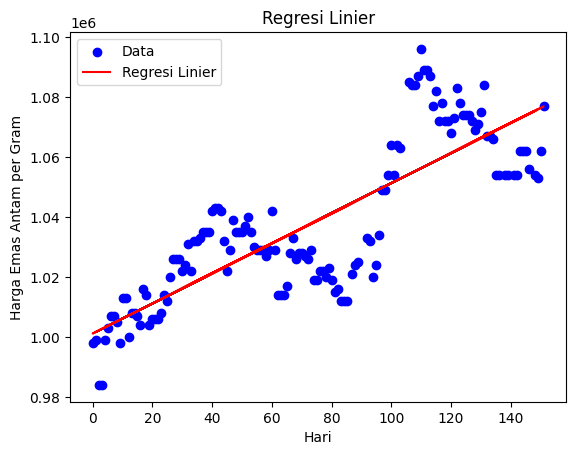

In [13]:
# Menampilkan grafik regresi linier
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X_train, y_train_pred, color='red', label='Regresi Linier')
plt.xlabel('Hari')
plt.ylabel('Harga Emas Antam per Gram')
plt.legend()
plt.title('Regresi Linier')
plt.show()